Dataset Link : http://www2.informatik.uni-freiburg.de/~cziegler/BX/

# Book Recommendation System

# 1st Step : Uploading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv("C:\\Users\\GauravMathur\\Desktop\\Recommendation System\\BX-Books.csv", sep = ';', error_bad_lines=False)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\GauravMathur\anaconda3\lib\site-packages\IPython\core\interactive

In [3]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [4]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users = pd.read_csv("C:\\Users\\GauravMathur\\Desktop\\Recommendation System\\BX-Users.csv", sep = ';', error_bad_lines=False)

In [6]:
users.columns = ['User id', 'Location', 'Age']
users.head()

,User id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings = pd.read_csv("C:\\Users\\GauravMathur\\Desktop\\Recommendation System\\BX-Book-Ratings.csv", sep = ';', error_bad_lines=False)

In [8]:
ratings.columns = ['User ID','ISBN', 'Book-Rating']
ratings.head()

,User ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


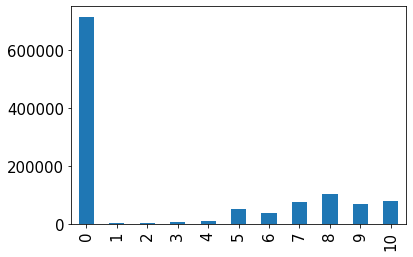

In [9]:
plt.rc("font", size=15)
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.show()

<AxesSubplot:>

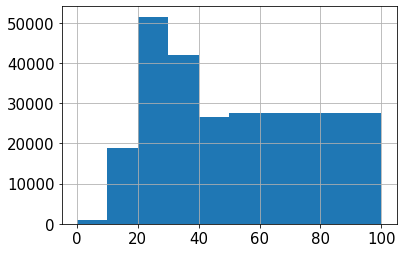

In [10]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])

# 𝐑𝐞𝐜𝐨𝐦𝐦𝐞𝐧𝐝𝐚𝐭𝐢𝐨𝐧 𝐁𝐚𝐬𝐞𝐝 𝐨𝐧 𝐑𝐚𝐭𝐢𝐧𝐠 𝐂𝐨𝐮𝐧𝐭𝐬

In [11]:
ratings_count = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
ratings_count.sort_values('Book-Rating',ascending = False).head()

,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [12]:
most_rated_books = pd.DataFrame(['0971880107','0316666343','0385504209','0060928336','0312195516'], index = np.arange(5), columns = ['ISBN'])

In [13]:
most_rated_books.head()

,ISBN
0,0971880107
1,0316666343
2,0385504209
3,0060928336
4,0312195516


In [14]:
recommended_books = pd.merge(most_rated_books, books,on = 'ISBN')
recommended_books[['ISBN','bookTitle', 'bookAuthor','publisher']].head()

,ISBN,bookTitle,bookAuthor,publisher
0,0971880107,Wild Animus,Rich Shapero,Too Far
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,"Little, Brown"
2,0385504209,The Da Vinci Code,Dan Brown,Doubleday
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,Perennial
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,Picador USA


# Recommendation based on Correlation 

In [15]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
average_rating['Count-Ratings'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('Count-Ratings', ascending = False).head()

,Book-Rating,Count-Ratings
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


𝐓𝐨 𝐞𝐧𝐬𝐮𝐫𝐞 𝐬𝐭𝐚𝐭𝐢𝐬𝐭𝐢𝐜𝐚𝐥 𝐬𝐢𝐠𝐧𝐢𝐟𝐢𝐜𝐚𝐧𝐜𝐞, 𝐮𝐬𝐞𝐫𝐬 𝐰𝐢𝐭𝐡 𝐥𝐞𝐬𝐬 𝐭𝐡𝐚𝐧 𝟐𝟎𝟎 𝐫𝐚𝐭𝐢𝐧𝐠𝐬, 𝐚𝐧𝐝 𝐛𝐨𝐨𝐤𝐬 𝐰𝐢𝐭𝐡 𝐥𝐞𝐬𝐬 𝐭𝐡𝐚𝐧 𝟏𝟎𝟎 𝐫𝐚𝐭𝐢𝐧𝐠𝐬 𝐚𝐫𝐞 𝐞𝐱𝐜𝐥𝐮𝐝𝐞𝐝.

In [16]:
counts1 = ratings['User ID'].value_counts()
ratings = ratings[ratings['User ID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(counts[counts >= 100].index)]

In [17]:
ratings.head()

,User ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


𝐂𝐫𝐞𝐚𝐭𝐢𝐧𝐠 𝐭𝐡𝐞 𝐏𝐢𝐯𝐨𝐭 𝐓𝐚𝐛𝐥𝐞

In [27]:
ratings_pivot = ratings.pivot(index='User ID', columns='ISBN', values = 'Book-Rating')
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Խcrosoft
User ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
ratings_pivot['0375404120']

User ID
254      NaN
2276     NaN
2766     NaN
2977     NaN
3363     NaN
          ..
275970   NaN
277427   NaN
277478   NaN
277639   NaN
278418   NaN
Name: 0375404120, Length: 905, dtype: float64

In [30]:
bones_ratings = ratings_pivot['0316666343']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['Count-Ratings'])
corr_summary[corr_summary['Count-Ratings']>=300].sort_values('pearsonR', ascending=False).head(10)

C:\Users\GauravMathur\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\GauravMathur\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,Count-Ratings
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


In [31]:
books_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'], 
                                  index=np.arange(9), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, books, on='ISBN')
corr_books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
7,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...
8,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...
